<a href="https://colab.research.google.com/github/ameyas1/RecommendationSystem/blob/master/adv_recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2020-07-13 13:49:32--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  1.48MB/s    in 0.6s    

2020-07-13 13:49:33 (1.48 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [2]:
import zipfile
with zipfile.ZipFile('ml-latest-small.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
import numpy as np 
import pandas as pd

In [4]:
# movie_df = pd.read_csv("/content/ml-1m/movies.dat", sep='::', engine='python', names=['movieId','title', 'genres'])
movie_df = pd.read_csv("/content/ml-latest-small/movies.csv")
movie_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
rating_df = pd.read_csv("/content/ml-latest-small/ratings.csv")
rating_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
tag_df = pd.read_csv("/content/ml-latest-small/tags.csv")
tag_df.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [7]:
tag_df = tag_df.groupby(['userId','movieId'])['tag'].apply(' '.join).reset_index()
tag_df.head()

,userId,movieId,tag
0,2,60756,funny Highly quotable will ferrell
1,2,89774,Boxing story MMA Tom Hardy
2,2,106782,drugs Leonardo DiCaprio Martin Scorsese
3,7,48516,way too long
4,18,431,Al Pacino gangster mafia


In [8]:
merge_mov_rat = movie_df.merge(rating_df,on='movieId').drop(['timestamp'], axis=1)

In [9]:
merge_mov_rat.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5


In [10]:
df_new = merge_mov_rat.merge(tag_df,on=['movieId','userId'])

In [11]:
df_new.tail(20)

,movieId,title,genres,userId,rating,tag
1615,161634,Don't Breathe (2016),Thriller,567,3.0,intense
1616,164179,Arrival (2016),Sci-Fi,567,4.0,beautiful visuals Cerebral cinematography good...
1617,164909,La La Land (2016),Comedy|Drama|Romance,567,3.0,Bittersweet visually appealing
1618,167746,The Lego Batman Movie (2017),Action|Animation|Comedy,567,3.5,funny heartwarming
1619,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,62,4.5,action dark hero gun tactics hitman Keanu Reev...
1620,168248,John Wick: Chapter Two (2017),Action|Crime|Thriller,610,5.0,Heroic Bloodshed
1621,168252,Logan (2017),Action|Sci-Fi,567,4.0,dark emotional gritty heartbreaking predictibl...
1622,170945,It Comes at Night (2017),Horror|Mystery|Thriller,567,3.5,paranoia Suspenseful
1623,174053,Black Mirror: White Christmas (2014),Drama|Horror|Mystery|Sci-Fi|Thriller,62,5.0,Dystopia future interesting jon hamm thought p...
1624,174055,Dunkirk (2017),Action|Drama|Thriller|War,567,3.5,brilliant inspiring tense


In [12]:
df_new['genres'] = df_new['genres'].map(lambda x: x.lower().split('|'))

In [13]:
df_new.head()

,movieId,title,genres,userId,rating,tag
0,1,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]",336,4.0,pixar
1,1,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]",474,4.0,pixar
2,1,Toy Story (1995),"[adventure, animation, children, comedy, fantasy]",567,3.5,fun
3,2,Jumanji (1995),"[adventure, children, fantasy]",62,4.0,fantasy magic board game Robin Williams
4,2,Jumanji (1995),"[adventure, children, fantasy]",474,3.0,game


In [14]:
df_new['genres']=df_new['genres'].map(lambda x: " ".join(x))

In [15]:
df_new.head()

,movieId,title,genres,userId,rating,tag
0,1,Toy Story (1995),adventure animation children comedy fantasy,336,4.0,pixar
1,1,Toy Story (1995),adventure animation children comedy fantasy,474,4.0,pixar
2,1,Toy Story (1995),adventure animation children comedy fantasy,567,3.5,fun
3,2,Jumanji (1995),adventure children fantasy,62,4.0,fantasy magic board game Robin Williams
4,2,Jumanji (1995),adventure children fantasy,474,3.0,game


In [16]:
df_new['info'] = df_new['genres'] +" "+ df_new['tag']

In [17]:
df_new.head()

,movieId,title,genres,userId,rating,tag,info
0,1,Toy Story (1995),adventure animation children comedy fantasy,336,4.0,pixar,adventure animation children comedy fantasy pixar
1,1,Toy Story (1995),adventure animation children comedy fantasy,474,4.0,pixar,adventure animation children comedy fantasy pixar
2,1,Toy Story (1995),adventure animation children comedy fantasy,567,3.5,fun,adventure animation children comedy fantasy fun
3,2,Jumanji (1995),adventure children fantasy,62,4.0,fantasy magic board game Robin Williams,adventure children fantasy fantasy magic board...
4,2,Jumanji (1995),adventure children fantasy,474,3.0,game,adventure children fantasy game


In [18]:
user_ids = df_new["userId"].unique().tolist()
movie_ids = df_new["movieId"].unique().tolist()

In [19]:
user_encode = {x: i for i, x in enumerate(user_ids)}
user_decode = {i: x for i, x in enumerate(user_ids)}

movie_encode = {x: i for i, x in enumerate(movie_ids)}
movie_decode = {i: x for i, x in enumerate(movie_ids)}

df_new["user"] = df_new["userId"].map(user_encode)
df_new["movie"] = df_new["movieId"].map(movie_encode)

In [20]:
num_users = len(user_encode)
num_movies = len(movie_encode)
df_new["rating"] = df_new["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df_new["rating"])
max_rating = max(df_new["rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

Number of users: 54, Number of Movies: 1464, Min rating: 0.5, Max rating: 5.0


In [21]:
df_new = df_new.sample(frac=1, random_state=42)

In [22]:
df_new.head()

,movieId,title,genres,userId,rating,tag,info,user,movie
937,5008,Witness for the Prosecution (1957),drama mystery thriller,474,4.0,Agatha Christie court,drama mystery thriller Agatha Christie court,1,824
1097,6545,I Capture the Castle (2003),drama romance,474,4.5,Dodie Smith,drama romance Dodie Smith,1,972
813,3897,Almost Famous (2000),drama,327,4.0,music,drama music,24,715
607,2412,Rocky V (1990),action drama,474,1.5,boxing,action drama boxing,1,527
1304,8970,Finding Neverland (2004),drama,474,4.0,Peter Pan,drama Peter Pan,1,1166


In [23]:
df_new.isnull().sum(axis=0)

movieId    0
title      0
genres     0
userId     0
rating     0
tag        0
info       0
user       0
movie      0
dtype: int64

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1635 entries, 937 to 1126
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  1635 non-null   int64  
 1   title    1635 non-null   object 
 2   genres   1635 non-null   object 
 3   userId   1635 non-null   int64  
 4   rating   1635 non-null   float32
 5   tag      1635 non-null   object 
 6   info     1635 non-null   object 
 7   user     1635 non-null   int64  
 8   movie    1635 non-null   int64  
dtypes: float32(1), int64(4), object(4)
memory usage: 121.3+ KB


In [25]:
x_id = df_new[["user", "movie"]].values
x_info = df_new[['info']].values
# Normalize the targets between 0 and 1. Makes it easy to train.
y = df_new["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
# train_indices = int(0.9 * df_new.shape[0])
# x_id_train, x_id_val, x_info_train, x_info_val, y_train, y_val = (
#     x_id[:train_indices],
#     x_id[train_indices:],
#     x_info[:train_indices],
#     x_info[train_indices:],
#     y[:train_indices],
#     y[train_indices:],
# )

In [26]:
import tensorflow as tf

In [27]:
import tensorflow_hub as hub

# embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4"))

hub_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-large/5", output_shape=[512],
                           input_shape=[], dtype=tf.string, trainable=True)

In [28]:
# dataset = tf.data.Dataset.from_tensor_slices(({"id": x_id_train, "info": x_info_train}, y_train))
dataset = tf.data.Dataset.from_tensor_slices(({"id": x_id, "info": x_info}, y))
dataset = dataset.batch(16)

In [29]:
# val_dataset = tf.data.Dataset.from_tensor_slices(({"id": x_id_val, "info": x_info_val}, y_val))
# val_dataset = val_dataset.batch(16)

In [30]:
EMBEDDING_SIZE = 50


class RecommenderNet(tf.keras.Model):
    def __init__(self, num_users, num_movies, embedding_size, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.num_users = num_users
        self.num_movies = num_movies
        self.embedding_size = embedding_size
        self.user_embedding = tf.keras.layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6),
        )
        # self.user_bias = layers.Embedding(num_users, 1)
        self.movie_embedding = tf.keras.layers.Embedding(
            num_movies,
            embedding_size,
            embeddings_initializer="he_normal",
            embeddings_regularizer=tf.keras.regularizers.l2(1e-6),
        )
        self.info_embedding = hub_layer
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(16, activation='relu')
        self.dense3 = tf.keras.layers.Dense(8, activation='relu')

        # self.dense4 = tf.keras.layers.Dense(256, activation='relu')
        self.lambda1 = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x,1))
        self.lstm1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128,return_sequences=True))
        self.lstm2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64))
        #self.dense5 = tf.keras.layers.Dense(128, activation='relu')
        self.dense6 = tf.keras.layers.Dense(32, activation='relu')

        self.dense7 = tf.keras.layers.Dense(32, activation='relu')
        self.dense8 = tf.keras.layers.Dense(1, activation='sigmoid')


        # self.movie_bias = layers.Embedding(num_movies, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs['id'][:,0])
        # user_bias = self.user_bias(inputs[:, 0])
        movie_vector = self.movie_embedding(inputs['id'][:,1])

        info_vector = self.info_embedding(inputs['info'][:,0])


        concat_layer = tf.keras.layers.concatenate([user_vector, movie_vector], axis =-1)


        concat_dense1 = self.dense1(concat_layer)
        concat_dense2 = self.dense2(concat_dense1)
        concat_dense3 = self.dense3(concat_dense2)

        info_lambda = self.lambda1(info_vector)
        info_lstm1 = self.lstm1(info_lambda)
        info_lstm2 = self.lstm2(info_lstm1)
        # info_dense2 = self.dense5(info_dense1)
        info_dense3 = self.dense6(info_lstm2)
        # info_dense3 = self.dense6(info_dense2)

        dense_concat = tf.keras.layers.concatenate([concat_dense3, info_dense3])

        final_dense1 = self.dense7(dense_concat)
        pred = self.dense8(final_dense1)
        # pred = self.dense8(info_vector)

        
        # movie_bias = self.movie_bias(inputs[:, 1])
        # dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)
        # Add all the components (including bias)
        # x = dot_user_movie + user_bias + movie_bias
        # The sigmoid activation forces the rating to between 0 and 1
        return pred


model = RecommenderNet(num_users, num_movies, EMBEDDING_SIZE)
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), optimizer=tf.keras.optimizers.Adam(lr=0.001)
)


In [31]:
for x,y in dataset.take(1):
  temp_x,temp_y =x,y

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint
filepath="adv_recommend.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=True, mode='min')

In [33]:
# def step_decay(epoch):
#   initial_lrate = 0.001
#   drop = 0.8
#   epochs_drop = 10.0
#   lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
#   return lrate



In [34]:
# from tensorflow.keras.callbacks import LearningRateScheduler
# from tensorflow.keras.callbacks import ReduceLROnPlateau

In [35]:
# import math

# lrate = LearningRateScheduler(step_decay)

lr_p = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='loss', factor=0.6, patience=3, verbose=0, mode='min', min_delta=0.000001, cooldown=0, min_lr=0)

callbacks_list = [checkpoint,lr_p]

In [36]:
history = model.fit(
    dataset,
    epochs=60,
    verbose=1,
    # validation_data=val_dataset,
    callbacks=callbacks_list
)

Epoch 1/60


103/103 [==============================] - ETA: 0s - loss: 0.5941
Epoch 00001: loss improved from inf to 0.59410, saving model to adv_recommend.hdf5
103/103 [==============================] - 27s 264ms/step - loss: 0.5941 - lr: 0.0010
Epoch 2/60
103/103 [==============================] - ETA: 0s - loss: 0.5720
Epoch 00002: loss improved from 0.59410 to 0.57203, saving model to adv_recommend.hdf5
103/103 [==============================] - 27s 263ms/step - loss: 0.5720 - lr: 0.0010
Epoch 3/60
103/103 [==============================] - ETA: 0s - loss: 0.5400
Epoch 00003: loss improved from 0.57203 to 0.54005, saving model to adv_recommend.hdf5
103/103 [==============================] - 27s 261ms/step - loss: 0.5400 - lr: 0.0010
Epoch 4/60
103/103 [==============================] - ETA: 0s - loss: 0.5268
Epoch 00004: loss improved from 0.54005 to 0.52679, saving model to adv_recommend.hdf5
103/103 [==============================] - 27s 262ms/step - loss: 0.5268 - lr: 0.0010
Epoch 5/60
103/

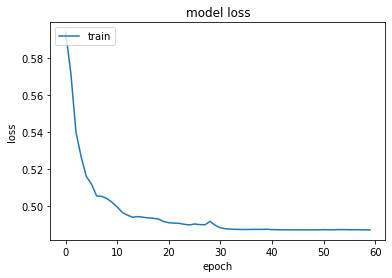

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"])
# plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
#plt.legend(["train", "test"], loc="upper left")
plt.legend(["train"], loc="upper left")
plt.show()

In [38]:
model.load_weights('/content/adv_recommend.hdf5')

In [55]:
# df_new.head()

,movieId,title,genres,userId,rating,tag,info,user,movie
937,5008,Witness for the Prosecution (1957),drama mystery thriller,474,4.0,Agatha Christie court,drama mystery thriller Agatha Christie court,1,824
1097,6545,I Capture the Castle (2003),drama romance,474,4.5,Dodie Smith,drama romance Dodie Smith,1,972
813,3897,Almost Famous (2000),drama,327,4.0,music,drama music,24,715
607,2412,Rocky V (1990),action drama,474,1.5,boxing,action drama boxing,1,527
1304,8970,Finding Neverland (2004),drama,474,4.0,Peter Pan,drama Peter Pan,1,1166


In [56]:
# user_id = df_new.userId.sample(1).iloc[0]

In [ ]:
# movies_watched_by_user = df_new[df_new.userId == user_id]
# movies_watched_by_user.head()

,movieId,title,genres,userId,rating,tag,info,user,movie
937,5008,Witness for the Prosecution (1957),drama mystery thriller,474,4.0,Agatha Christie court,drama mystery thriller Agatha Christie court,1,824
1097,6545,I Capture the Castle (2003),drama romance,474,4.5,Dodie Smith,drama romance Dodie Smith,1,972
607,2412,Rocky V (1990),action drama,474,1.5,boxing,action drama boxing,1,527
1304,8970,Finding Neverland (2004),drama,474,4.0,Peter Pan,drama Peter Pan,1,1166
1074,6368,Cinemania (2002),documentary,474,3.5,movies,documentary movies,1,952


In [ ]:
# user = movies_watched_by_user.sort_values(by='rating', ascending=False)[:1]

In [ ]:
# user

,movieId,title,genres,userId,rating,tag,info,user,movie
512,1947,West Side Story (1961),drama musical romance,474,5.0,Gangs,drama musical romance Gangs,1,436


In [ ]:
# user_id, title, info = user[["userId","title","info"]].values[0]

In [106]:
# user_id, title, info = 1000000000000, 'Deadpool 2 (2018)', 'best action hero'
# movies_watched_by_user = pd.DataFrame({'movieId':[187593]})

In [107]:
# movies_watched_by_user.head()

,movieId
0,187593


In [111]:
# sim_user_id = df_new[df_new.title == title].sort_values(by='rating', ascending=False)[:5]['userId'].iloc[0]

In [109]:
# movies_watched_by_user = df_new[df_new.userId == sim_user_id]
# movies_watched_by_user.head()

,movieId,title,genres,userId,rating,tag,info,user,movie
1582,122912,Avengers: Infinity War - Part I (2018),action adventure sci-fi,62,4.0,comic book Dr. Strange Great villain Guardians...,action adventure sci-fi comic book Dr. Strange...,3,1414
1428,53464,Fantastic Four: Rise of the Silver Surfer (2007),action adventure sci-fi,62,3.0,bad acting bad jokes bad plot Chris Evans Jess...,action adventure sci-fi bad acting bad jokes b...,3,1281
1096,6541,"League of Extraordinary Gentlemen, The (a.k.a....",action fantasy sci-fi,62,3.5,captain nemo comic book gothic Peta Wilson Sea...,action fantasy sci-fi captain nemo comic book ...,3,971
1598,139385,The Revenant (2015),adventure drama,62,4.0,leonardo DiCarpio survival tom hardy visually ...,adventure drama leonardo DiCarpio survival tom...,3,1429
1187,7153,"Lord of the Rings: The Return of the King, The...",action adventure drama fantasy,62,5.0,Adventure ensemble cast fantasy fantasy world ...,action adventure drama fantasy Adventure ensem...,3,1059


In [ ]:
# user_id, title, info, sim_user_id

(1000000000000, 'Deadpool 2 (2018)', 'best action hero', 62)

In [ ]:

# movies_not_watched = df_new[
#     ~df_new["movieId"].isin(movies_watched_by_user.movieId.values)
# ]["movieId"]
# movies_not_watched = list(
#     set(movies_not_watched).intersection(set(movie_encode.keys()))
# )

In [ ]:
# user_encoder = user_encode.get(user_id, user_encode.get(sim_user_id))
# movies_not_watched = [[movie_encode.get(x)] for x in movies_not_watched]

In [ ]:
# user_movie_array = np.concatenate([[[user_encoder]] * len(movies_not_watched),movies_not_watched],axis=1)

In [ ]:
# user_movie_info = [info] * len(movies_not_watched)

In [ ]:
# ratings = model.predict({'id':np.array(user_movie_array),'info': np.array(user_movie_info)}).flatten()
# top_ratings_indices = ratings.argsort()[-10:][::-1]
# recommended_movie_ids = [
#     movie_decode.get(movies_not_watched[x][0]) for x in top_ratings_indices
# ]

# print("Showing recommendations for user: {} on movie: {} with tags: {}".format(user_id,title, info))
# print("====" * 9)

# print("Movies with high ratings from user")
# print("----" * 8)
# top_movies_user = (
#     movies_watched_by_user.sort_values(by="rating", ascending=False)
#     .head(5)
#     .movieId.values
# )
# movie_df_rows = df_new[df_new["movieId"].isin(top_movies_user)]
# for row in movie_df_rows.itertuples():
#     print(row.title, ":", row.genres)

# print("----" * 8)
# print("Top 10 movie recommendations")
# print("----" * 8)
# recommended_movies = df_new[df_new["movieId"].isin(recommended_movie_ids)]
# for row in recommended_movies.itertuples():
#     print(row.title, ":", row.genres)

Showing recommendations for user: 1000000000000 on movie: Deadpool 2 (2018) with tags: best action hero
Movies with high ratings from user
--------------------------------
Lord of the Rings: The Return of the King, The (2003) : action adventure drama fantasy
Addams Family, The (1991) : children comedy fantasy
Django Unchained (2012) : action drama western
Lord of the Rings: The Return of the King, The (2003) : action adventure drama fantasy
Black Mirror: White Christmas (2014) : drama horror mystery sci-fi thriller
Godfather: Part III, The (1990) : crime drama mystery thriller
Django Unchained (2012) : action drama western
--------------------------------
Top 10 movie recommendations
--------------------------------
Talented Mr. Ripley, The (1999) : drama mystery thriller
Godfather: Part II, The (1974) : crime drama
Andalusian Dog, An (Chien andalou, Un) (1929) : fantasy
Man Bites Dog (C'est arrivé près de chez vous) (1992) : comedy crime drama thriller
Godfather: Part II, The (1974) :

317    474
Name: userId, dtype: int64

In [86]:
# df_new.userId.unique()

array([474, 327,  62, 424,  18, 567, 125, 318, 477, 256, 537, 606, 336,
       513, 506, 356, 573,  63, 167, 289, 291, 357,   2, 112, 520, 119,
       599, 305, 184, 205, 274,  21, 106, 419, 177, 462, 193, 300, 439,
       132, 166, 103, 533, 226,  76, 161, 435, 610,  49, 138, 487, 509,
         7, 319])

In [39]:
import random

def random_existing_user_recommend_for_title_for_highest_rating(df_new, user_ids, movie_ids):


  user_id = random.choice(user_ids)
  movies_watched_by_user = df_new[df_new.userId == user_id]
  user = movies_watched_by_user.sort_values(by='rating', ascending=False)[:1]


  user_id, title, info = user[["userId","title","info"]].values[0]

  movies_not_watched = df_new[
    ~df_new["movieId"].isin(movies_watched_by_user.movieId.values)]["movieId"]

  movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie_encode.keys())))
  
  def Repeat(x): 
    _size = len(x) 
    repeated = ["None","i zm"] 
    for i in range(_size): 
        k = i + 1
        for j in range(k, _size): 
            if x[i] == x[j] and x[i] not in repeated: 
                repeated.append(x[i]) 
    return repeated 

  
  user_encoder = user_encode.get(user_id)
  movies_not_watched = [[movie_encode.get(x)] for x in movies_not_watched]

  user_movie_array = np.concatenate([[[user_encoder]] * len(movies_not_watched),movies_not_watched],axis=1)

  user_movie_info = [info] * len(movies_not_watched)

  ratings = model.predict({'id':np.array(user_movie_array),'info': np.array(user_movie_info)}).flatten()


  top_ratings_indices = ratings.argsort()[-10:][::-1]
  recommended_movie_ids = [
    movie_decode.get(movies_not_watched[x][0]) for x in top_ratings_indices]

  print("Showing recommendations for user: {} on movie: {} with tags: {}".format(user_id,title, info))
  print("====" * 9)

  print("Movies with high ratings from user")
  print("----" * 8)
  top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .movieId.values)
  
  movie_df_rows = df_new[df_new["movieId"].isin(top_movies_user)]

  movie_df_rows=movie_df_rows.drop_duplicates(subset='movieId', keep="last")

  for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)

  print("----" * 8)
  print("Top 10 movie recommendations")
  print("----" * 8)
  recommended_movies = df_new[df_new["movieId"].isin(recommended_movie_ids)]

  recommended_movies=recommended_movies.drop_duplicates(subset='movieId', keep="last")

  for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)



  



In [40]:
random_existing_user_recommend_for_title_for_highest_rating(df_new, user_ids,movie_ids)

Showing recommendations for user: 567 on movie: Eraserhead (1977) with tags: drama horror art house Atmospheric creepy cryptic dark disturbing dreamlike enigmatic fucked up gruesome hallucinatory Insane paranoid strange surreal weird
Movies with high ratings from user
--------------------------------
Blade Runner 2049 (2017) : sci-fi
Eternal Sunshine of the Spotless Mind (2004) : drama romance sci-fi
Eraserhead (1977) : drama horror
Mary and Max (2009) : animation comedy drama
Come and See (Idi i smotri) (1985) : drama war
--------------------------------
Top 10 movie recommendations
--------------------------------
L.A. Confidential (1997) : crime film-noir mystery thriller
Star Wars: Episode V - The Empire Strikes Back (1980) : action adventure sci-fi
Godfather: Part II, The (1974) : crime drama
Lord of the Rings: The Return of the King, The (2003) : action adventure drama fantasy
Guys and Dolls (1955) : comedy musical romance
Shawshank Redemption, The (1994) : crime drama
Talented M

In [41]:
def new_user_or_new_recommend(df_new, user_ids, movie_ids, title, info):


  sim_user_id = df_new[df_new.title == title].sort_values(by='rating', ascending=False)[:5]['userId'].iloc[0]
  movies_watched_by_user = df_new[df_new.userId == sim_user_id]

  user_id = sim_user_id

  movies_not_watched = df_new[
    ~df_new["movieId"].isin(movies_watched_by_user.movieId.values)]["movieId"]

  movies_not_watched = list(
    set(movies_not_watched).intersection(set(movie_encode.keys())))
  
  
  user_encoder = user_encode.get(user_id)
  movies_not_watched = [[movie_encode.get(x)] for x in movies_not_watched]

  user_movie_array = np.concatenate([[[user_encoder]] * len(movies_not_watched),movies_not_watched],axis=1)

  user_movie_info = [info] * len(movies_not_watched)

  ratings = model.predict({'id':np.array(user_movie_array),'info': np.array(user_movie_info)}).flatten()


  top_ratings_indices = ratings.argsort()[-10:][::-1]
  recommended_movie_ids = [
    movie_decode.get(movies_not_watched[x][0]) for x in top_ratings_indices]

  print("Showing recommendations from similar user: {} on movie: {} with tags: {}".format(user_id,title, info))
  print("====" * 9)

  print("Movies with high ratings from similar user")
  print("----" * 8)
  top_movies_user = (
    movies_watched_by_user.sort_values(by="rating", ascending=False)
    .head(5)
    .movieId.values)
  
  movie_df_rows = df_new[df_new["movieId"].isin(top_movies_user)]

  movie_df_rows=movie_df_rows.drop_duplicates(subset='movieId', keep="last")

  for row in movie_df_rows.itertuples():
    print(row.title, ":", row.genres)

  print("----" * 8)
  print("Top 10 movie recommendations")
  print("----" * 8)
  recommended_movies = df_new[df_new["movieId"].isin(recommended_movie_ids)]

  recommended_movies=recommended_movies.drop_duplicates(subset='movieId', keep="last")

  for row in recommended_movies.itertuples():
    print(row.title, ":", row.genres)

In [42]:
new_user_or_new_recommend(df_new, user_ids, movie_ids, 'Sixth Sense, The (1999)', 'plot twist best horror')

Showing recommendations from similar user: 357 on movie: Sixth Sense, The (1999) with tags: plot twist best horror
Movies with high ratings from similar user
--------------------------------
Dark Knight Rises, The (2012) : action adventure crime imax
Sixth Sense, The (1999) : drama horror mystery
Jezebel (1938) : drama
William Shakespeare's Romeo + Juliet (1996) : drama romance
Gone Baby Gone (2007) : crime drama mystery
--------------------------------
Top 10 movie recommendations
--------------------------------
Andalusian Dog, An (Chien andalou, Un) (1929) : fantasy
Man Bites Dog (C'est arrivé près de chez vous) (1992) : comedy crime drama thriller
Godfather: Part II, The (1974) : crime drama
Lord of the Rings: The Return of the King, The (2003) : action adventure drama fantasy
Guys and Dolls (1955) : comedy musical romance
Shawshank Redemption, The (1994) : crime drama
Talented Mr. Ripley, The (1999) : drama mystery thriller
World of Tomorrow (2015) : animation comedy
Come and See 

In [43]:
def recommendations_on_movies(df_new, user_ids, movie_ids, title, info):
  movies_unique = df_new.title.unique()

  list_of_movies=[]
  info = info.lower()
  for movie in df_new.title.unique():
    if title.lower() in movie.lower():
      list_of_movies.append(movie)

  if len(list_of_movies)==0:
    return 'movie not found in database'
  else:
    for rec_movie in list_of_movies:
      new_user_or_new_recommend(df_new, user_ids, movie_ids, rec_movie, info)
      print("*"*70)

 



In [45]:
recommendations_on_movies(df_new, user_ids, movie_ids, "You've Got Mail", "comedy romance")

Showing recommendations from similar user: 474 on movie: You've Got Mail (1998) with tags: comedy romance
Movies with high ratings from similar user
--------------------------------
Strictly Ballroom (1992) : comedy romance
Safety Last! (1923) : action comedy romance
Truly, Madly, Deeply (1991) : drama romance
West Side Story (1961) : drama musical romance
You've Got Mail (1998) : comedy romance
--------------------------------
Top 10 movie recommendations
--------------------------------
Andalusian Dog, An (Chien andalou, Un) (1929) : fantasy
Man Bites Dog (C'est arrivé près de chez vous) (1992) : comedy crime drama thriller
Blade Runner 2049 (2017) : sci-fi
It's Such a Beautiful Day (2012) : animation comedy drama fantasy sci-fi
Eraserhead (1977) : drama horror
World of Tomorrow (2015) : animation comedy
Mary and Max (2009) : animation comedy drama
Come and See (Idi i smotri) (1985) : drama war
Big Hero 6 (2014) : action animation comedy
Jetée, La (1962) : romance sci-fi
************